In [1]:
from PIL import Image

from transformers import CLIPProcessor, CLIPModel
from augmentations import AugImage, AugText

In [2]:
# Took an original moddel CLIP
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [3]:
image = Image.open('data_examples/sofa_on_cats.png')

### Little look at model work with several caption variations

In [4]:
inputs = processor(text=["a photo of cats", "a photo of dogs"], images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) 

/usr/local/lib/python3.8/dist-packages/transformers/feature_extraction_utils.py:158: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  tensor = as_tensor(value)


In [5]:
logits_per_image, probs

(tensor([[28.1434, 21.7322]], grad_fn=<PermuteBackward0>),
 tensor([[0.9984, 0.0016]], grad_fn=<SoftmaxBackward0>))

In [6]:
inputs = processor(text=["the pink cats on the striped sofa", "the striped cats on the pink sofa"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.3755, 0.6245]], grad_fn=<SoftmaxBackward0>)

In [7]:
inputs = processor(text=["pink cats and striped sofa", "striped cats and pink sofa"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.4643, 0.5357]], grad_fn=<SoftmaxBackward0>)

In [8]:
inputs = processor(text=["the cats on the sofa", "the sofa on the cats"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.4602, 0.5398]], grad_fn=<SoftmaxBackward0>)

*Ability to take compositional information into account is almost random classification*

### We will try to change compositional information and look at logits 

In [18]:
text = 'two striped cats on pink sofa with remote controller'

In [17]:
obj_text = AugText(text)
augmented_text = obj_text.aug_text()
augmented_text

'two striped cats on pink controller with remote sofa'

In [22]:
inputs = processor(text=[text], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[35.3009]], grad_fn=<PermuteBackward0>)

In [21]:
inputs = processor(text=[augmented_text], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[33.2693]], grad_fn=<PermuteBackward0>)

In [24]:
inputs = processor(text=['something inappropriate'], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[21.8892]], grad_fn=<PermuteBackward0>)

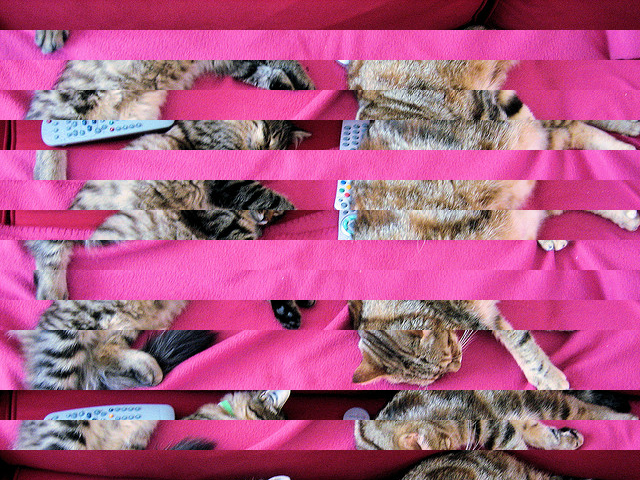

In [47]:
obj_image = AugImage('data_examples/sofa_on_cats.png')
augmented_img = obj_image.aug_image()
augmented_img

In [48]:
inputs = processor(text=[text], images=augmented_img, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[27.9337]], grad_fn=<PermuteBackward0>)

*Practically, VLMs with CTC loss are weak in compositional knowledge. Augmented texts and losses have to be used in training as negative examples*